In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Evtl. hat Azure nur 0.19, wir brauchen aber .20 für das Plotting, dann das hier installieren und Notebook neu starten
# !conda update pandas -y

In [4]:
import pandas as pd
print(pd.__version__)

0.20.3


# Plot randomly generated classification dataset

http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

http://scikit-learn.org/stable/datasets/index.html#sample-generators

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

Plot several randomly generated 2D classification datasets.
This example illustrates the :func:`datasets.make_classification`
:func:`datasets.make_blobs` and :func:`datasets.make_gaussian_quantiles`
functions.

For ``make_classification``, three binary and two multi-class classification
datasets are generated, with different numbers of informative features and
clusters per class.  


In [5]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

# https://www.welt.de/motor/news/article156991316/Unfallstatistik-2015.html
# http://www.openculture.com/2017/12/why-incompetent-people-think-theyre-amazing.html
# 0: young drivers with fast cars: red
# 1: reasonable drivers: green
# 2: a little bit older, more kilometers, general noise: yellow
# 3: really old drivers: red
# 4: young drivers: red
# 5: another green just to have a counter part to all the red ones: green
# 6: people who do not drive a lot: green
# 7: people who drive a lot: yellow
# 8: young people with slow cars: yellow

centers = [(200, 35, 50), (160, 50, 25), (170, 55, 30), (170, 75, 20), (170, 30, 30), (190, 45, 40), (160, 40, 15), (180, 50, 45), (140, 25, 15)]
cluster_std = [4, 9, 18, 8, 9, 5, 8, 12, 5]

X, y = make_blobs(n_samples=300, n_features=3, centers=centers, random_state=42, cluster_std = cluster_std)

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
# X, y = make_classification(n_features=3, n_redundant=0, n_informative=3,
#                              n_clusters_per_class=2, n_classes=3, random_state=42)

feature_names = ['max speed', 'age' ,'thousand km per year']
df = pd.DataFrame(X, columns=feature_names)
df = df.round()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.clip.html

df['max speed'] = df['max speed'].clip(90,400)
df['age'] = df['age'].clip(18,90)
df['thousand km per year'] = df['thousand km per year'].clip(5,500)

X = df.as_matrix()

# merges clusters into one group
for group in np.nditer(y, op_flags=['readwrite']):
    if group == 3 or group == 4:
        group[...] = 0
    if group == 5 or group == 6:
        group[...] = 1
    if group == 7 or group == 8:
        group[...] = 2


In [6]:
df.describe()

,max speed,age,thousand km per year
count,300.000000,300.000000,300.000000
mean,171.863333,44.006667,31.220000
std,18.807545,16.191784,15.411792
min,132.000000,18.000000,5.000000
25%,159.000000,33.000000,18.000000
50%,171.000000,42.000000,30.000000
75%,187.000000,52.000000,43.000000
max,211.000000,90.000000,99.000000


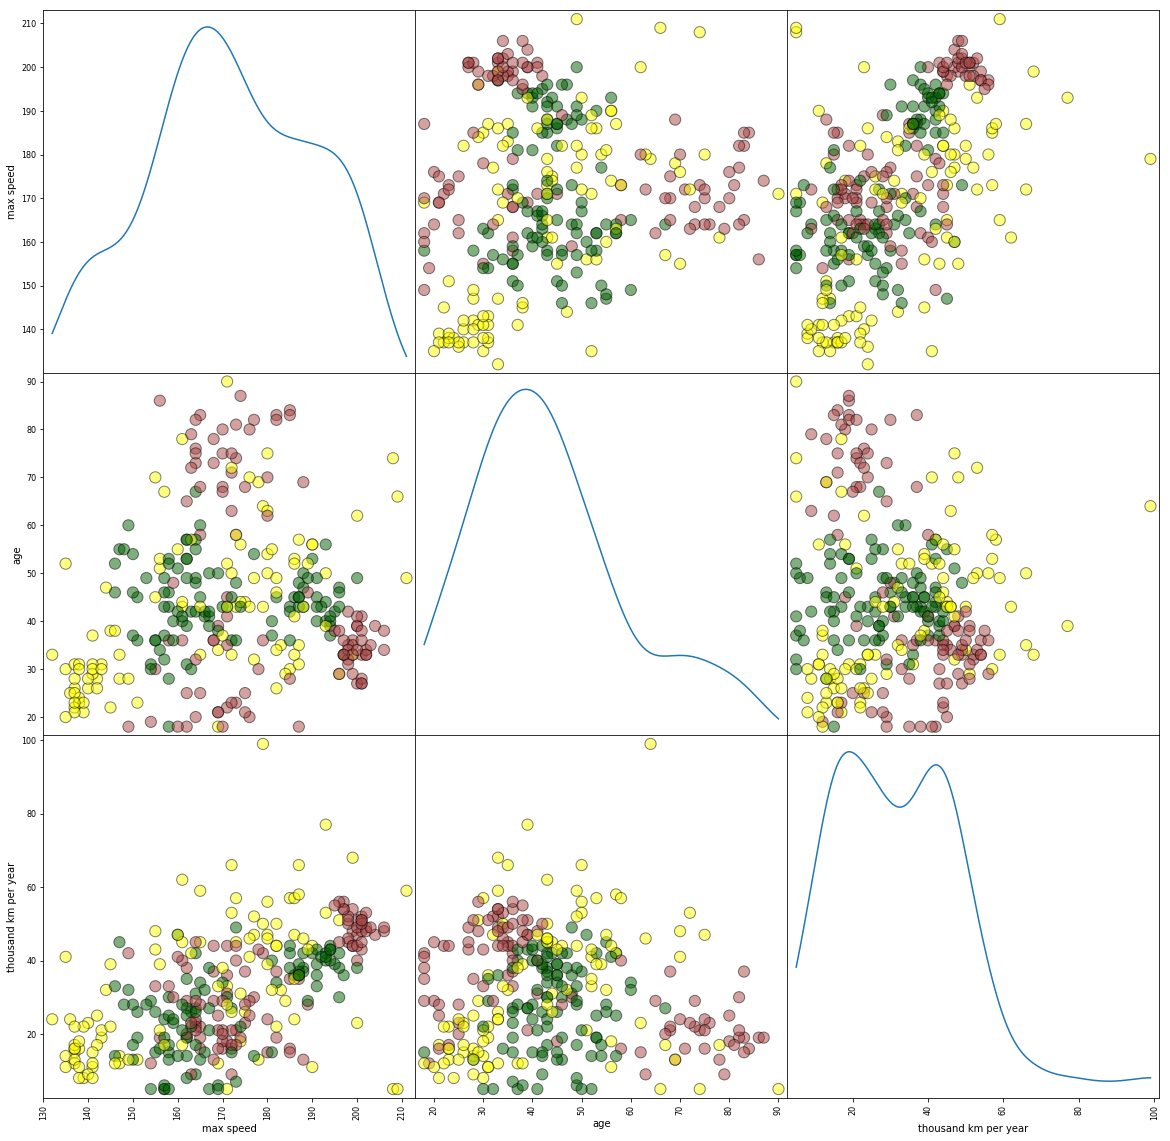

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.clf()
plt.figure(figsize=(20, 20))

CMAP = ListedColormap(['#AA4444', '#006000', '#FFFF00'])

pd.plotting.scatter_matrix(df, c=y, cmap=CMAP, s=500, edgecolor='black', figsize=(20, 20), diagonal='kde')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((180, 3), (180,), (120, 3), (120,))

In [11]:
from sklearn import neighbors

In [12]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

In [13]:
X_train_kmh_age = X_train[:, :2]
X_test_kmh_age = X_test[:, :2]

In [14]:
X_train_2_dim = X_train_kmh_age
X_test_2_dim = X_test_kmh_age

In [19]:
# 0: red
# 1: green
# 2: yellow

class ClassifierBase:
    def predict(self, X):
        return np.array([ self.predict_single(x) for x in X])
    def score(self, X, y):
        n = len(y)
        correct = 0
        predictions = self.predict(X)
        for prediction, ground_truth in zip(predictions, y):
            if prediction == ground_truth:
                correct = correct + 1
        return correct / n

class BaseLineClassifier(ClassifierBase):
    def predict_single(self, x):
        try:
            speed, age, km_per_year = x
        except:
            speed, age = x
            km_per_year = 0
        if age < 25:
            if speed > 180:
                return 0
            else:
                return 2
        if age > 75:
            return 0
        if km_per_year > 50:
            return 0
        if km_per_year > 35:
            return 2
        return 1
    
from random import randrange

class RandomClassifier(ClassifierBase):
    def predict_single(self, x):
        return randrange(3)

In [26]:
from scipy.stats import norm

Text(0.5,0,'Age')

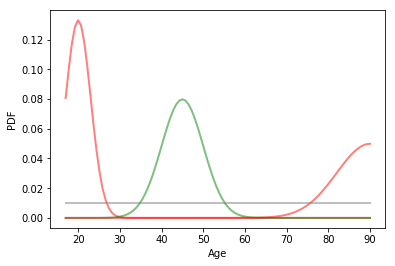

In [27]:
age_threshold = 0.01
ages = np.linspace(17, 90, 100)

def is_young(age):
    return norm.pdf(age, loc=20, scale=3)

def good_age(age):
    return norm.pdf(age, loc=45, scale=5)

def is_old(age):
    return norm.pdf(age, loc=90, scale=8)

plt.plot(ages, is_young(ages), 'r', lw=2, alpha=0.5)
plt.plot(ages, good_age(ages), 'g', lw=2, alpha=0.5)
plt.plot(ages, is_old(ages), 'r', lw=2, alpha=0.5)
plt.plot(ages, np.full(100, age_threshold), 'gray', lw=2, alpha=0.5)

plt.ylabel('PDF')
plt.xlabel('Age')

Text(0.5,0,'thousand km per year')

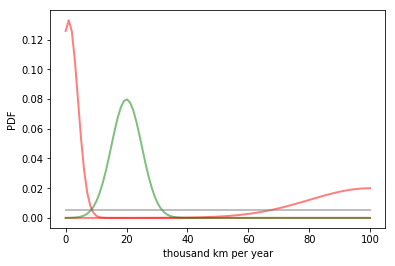

In [85]:
kms = np.linspace(0, 100, 100)
kms_threshold = 0.005

def no_practice(km):
    return norm.pdf(km, loc=1, scale=3)

def much_driving(km):
    return norm.pdf(km, loc=100, scale=20)

def sweet_spot(km):
    return norm.pdf(km, loc=20, scale=5)

plt.plot(kms, no_practice(kms), 'r', lw=2, alpha=0.5)
plt.plot(kms, much_driving(kms), 'r', lw=2, alpha=0.5)
plt.plot(kms, sweet_spot(kms), 'g', lw=2, alpha=0.5)
plt.plot(kms, np.full(100, kms_threshold), 'gray', lw=2, alpha=0.5)

plt.ylabel('PDF')
plt.xlabel('thousand km per year')

Text(0.5,0,'km/h')

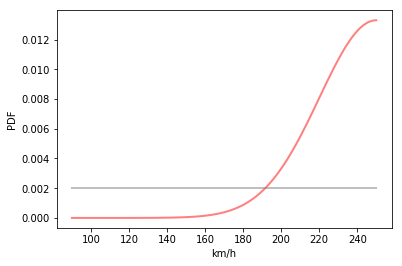

In [29]:
kmhs = np.linspace(90, 250, 100)
kmhs_threshold = 0.002

def too_fast(kmh):
    return norm.pdf(kmh, loc=250, scale=30)

plt.plot(kmhs, too_fast(kmhs), 'r', lw=2, alpha=0.5)
plt.plot(kmhs, np.full(100, kmhs_threshold), 'gray', lw=2, alpha=0.5)

plt.ylabel('PDF')
plt.xlabel('km/h')

In [38]:
def predict(x):
    speed, age, km_per_year = x
    if (is_young(age) > age_threshold or is_old(age) > age_threshold
        or too_fast(speed) > kmhs_threshold
        or no_practice(km_per_year) > kms_threshold or much_driving(km_per_year) > kms_threshold):
        return 0
    if good_age(age) > age_threshold or sweet_spot(km_per_year)  > kms_threshold:
        return 1
    return 2

class StatsClassifier(ClassifierBase):
    def predict_single(self, x):
        try:
            speed, age, km_per_year = x
        except:
            speed, age = x
            km_per_year = 40
        return predict([speed, age, km_per_year])


In [40]:
predict([190, 47, 10])

1

In [42]:
X_train[0]

array([ 137.,   23.,   16.])

In [63]:
stats_clf = StatsClassifier()
stats_clf.predict_single(X_train[0])

0

In [64]:
stats_clf.score(X_train_2_dim, y_train)

0.5611111111111111

In [65]:
stats_clf.score(X, y)

0.5133333333333333

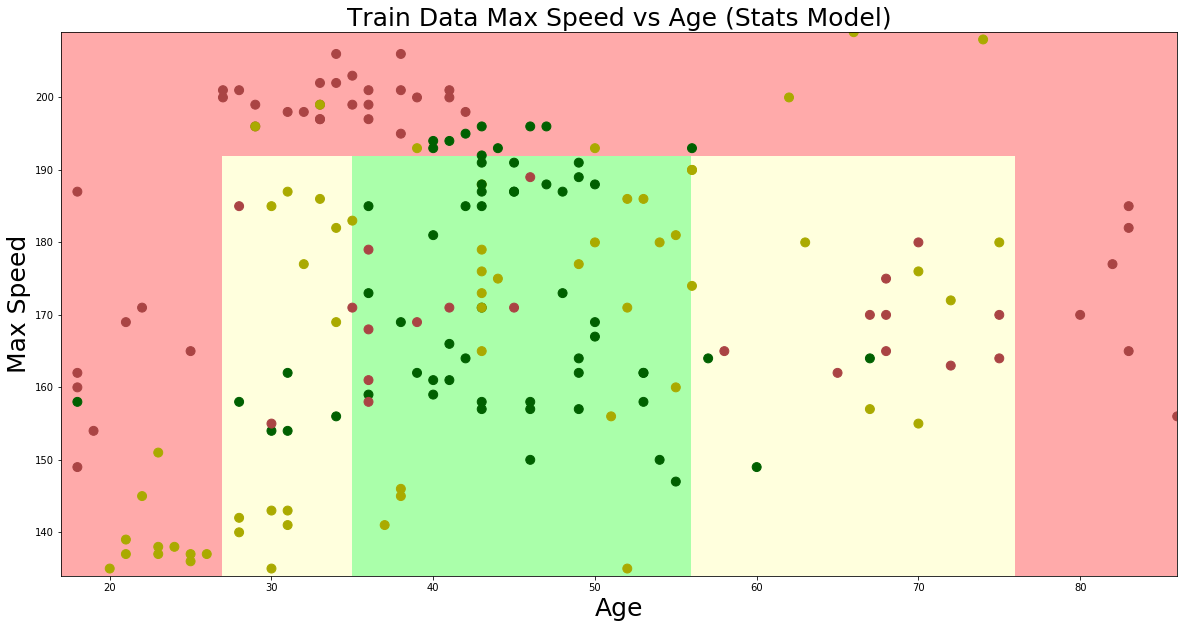

In [62]:
plotPrediction(stats_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age (Stats Model)")

In [127]:
age_factor = 1
kmhs_factor = 10
kms_factor = 0.5

def scoring(x):
    speed, age, km_per_year = x
    pos_score = good_age(age) * age_factor + sweet_spot(km_per_year) * kms_factor
    neg_score = (is_young(age) * age_factor + is_old(age) * age_factor
        + too_fast(speed) * kmhs_factor
        + no_practice(km_per_year) * kms_factor + much_driving(km_per_year) * kms_factor)
    return pos_score - neg_score

score_threshold = 0.01

def predict_for_score(x):
    score = scoring(x)
    if abs(score) < score_threshold:
        return 2
    if score < 0:
        return 0
    return 1

class ScoringStatsClassifier(ClassifierBase):
    def predict_single(self, x):
        try:
            speed, age, km_per_year = x
        except:
            speed, age = x
            km_per_year = 40
        return predict_for_score([speed, age, km_per_year])


In [128]:
scoring_stats_clf = ScoringStatsClassifier()
scoring_stats_clf.predict_single(X_train[0])

0

In [132]:
scoring_stats_clf.score(X_train_2_dim, y_train)

0.5944444444444444

In [133]:
scoring_stats_clf.score(X_test_2_dim, y_test)

0.625

In [134]:
scoring_stats_clf.score(X, y)

0.53

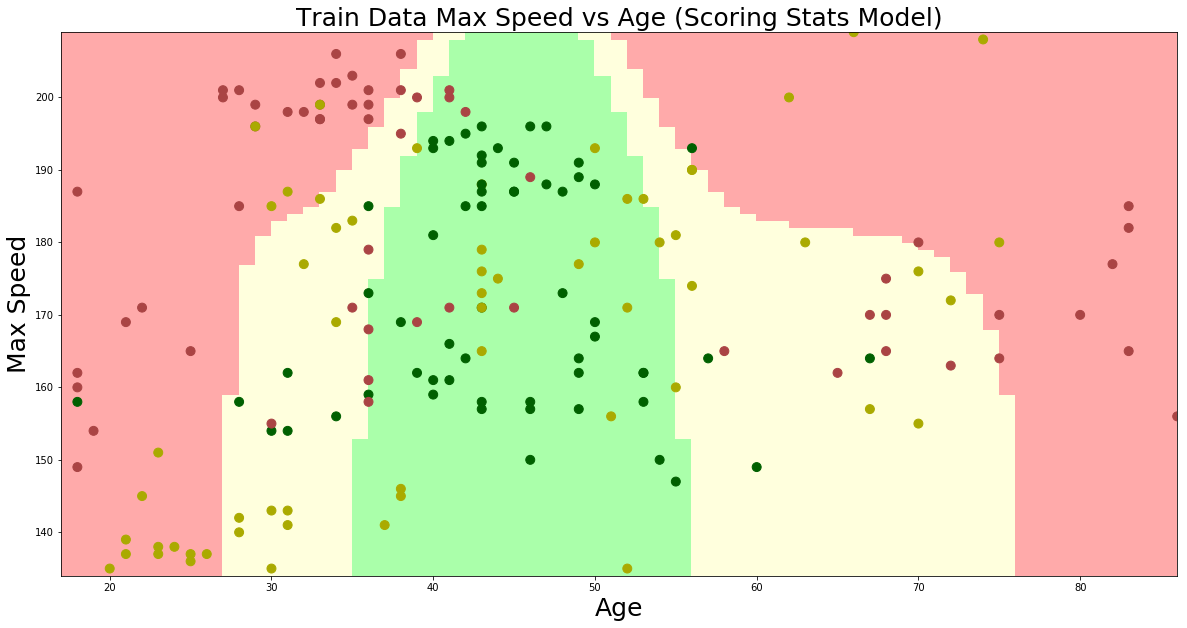

In [131]:
plotPrediction(scoring_stats_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age (Scoring Stats Model)")

In [35]:
random_clf = RandomClassifier()
random_clf.predict_single(X_train[0])

1

In [57]:
random_clf.score(X, y)

0.31

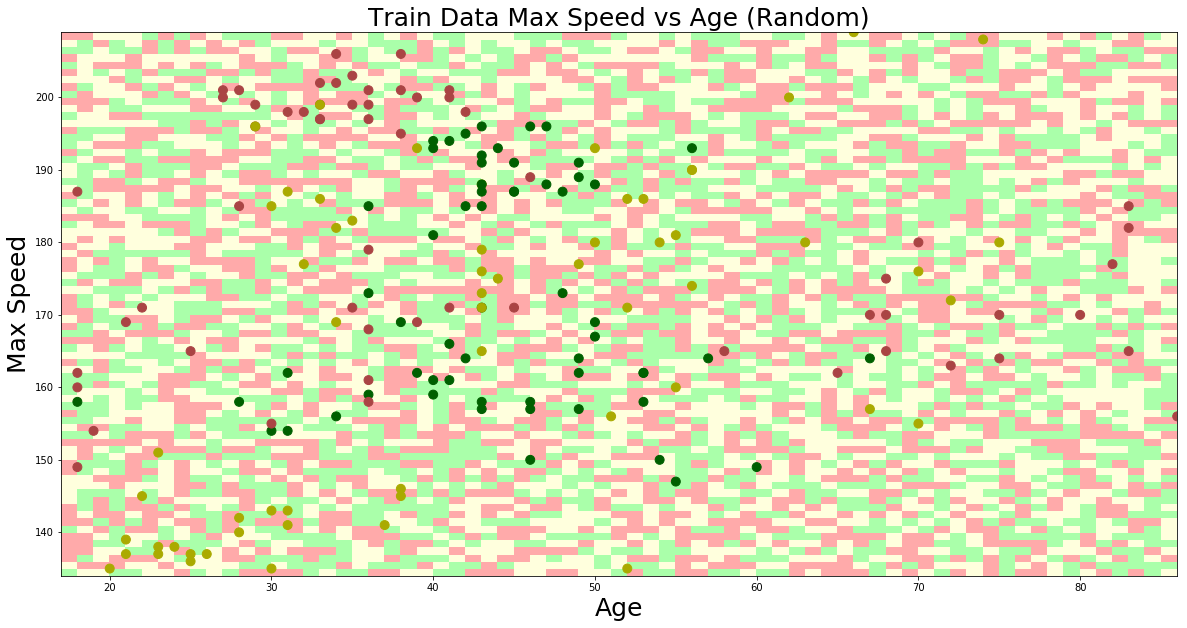

In [58]:
plotPrediction(random_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age (Random)")

In [45]:
base_clf = BaseLineClassifier()
base_clf.predict_single(X_train[0])

2

In [46]:
base_clf.predict_single(array([ 137.,   23.]))

2

In [47]:
samples = np.array([X_train[0], X_train[1]])
samples

array([[ 137.,   23.,   16.],
       [ 137.,   25.,   13.]])

In [48]:
ground_truth = np.array([y_train[0], y_train[1]])
ground_truth

array([2, 2])

In [49]:
base_clf.predict(samples)

array([2, 1])

In [50]:
base_clf.score(samples, ground_truth)

0.5

In [51]:
base_clf.score(X_train, y_train)

0.43333333333333335

In [53]:
base_clf.score(X_train_2_dim, y_train)

0.4111111111111111

In [54]:
base_clf.score(X, y)

0.43666666666666665

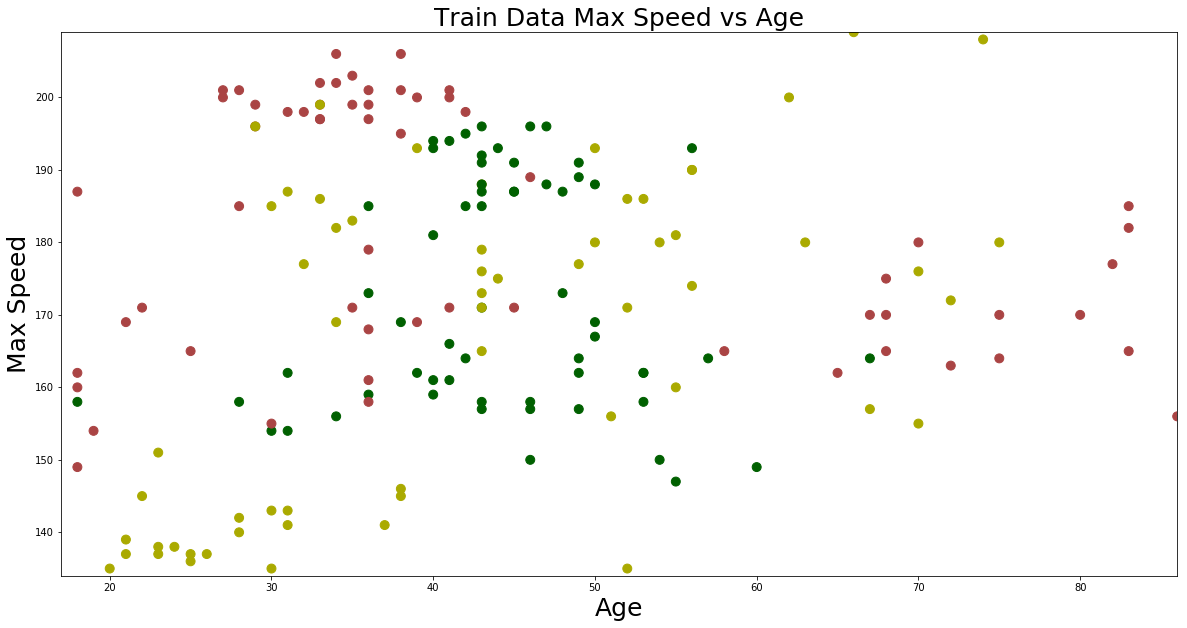

In [66]:
plotPrediction(base_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, mesh=False,
                title="Train Data Max Speed vs Age")

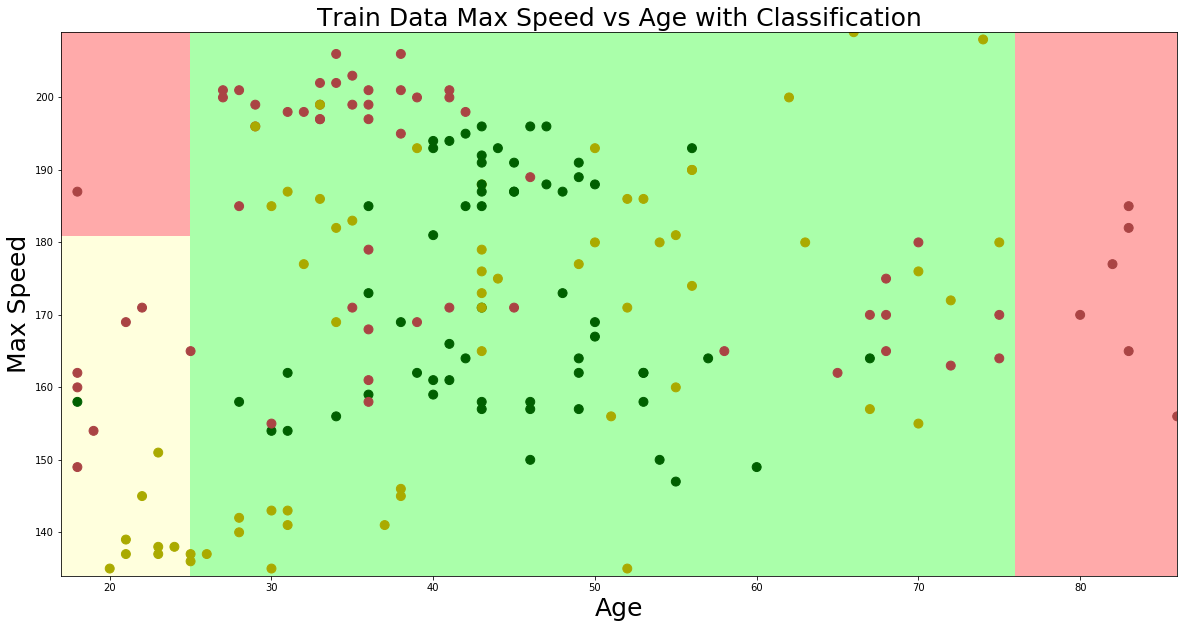

In [67]:
plotPrediction(base_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [68]:
clf = neighbors.KNeighborsClassifier(1)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.9 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

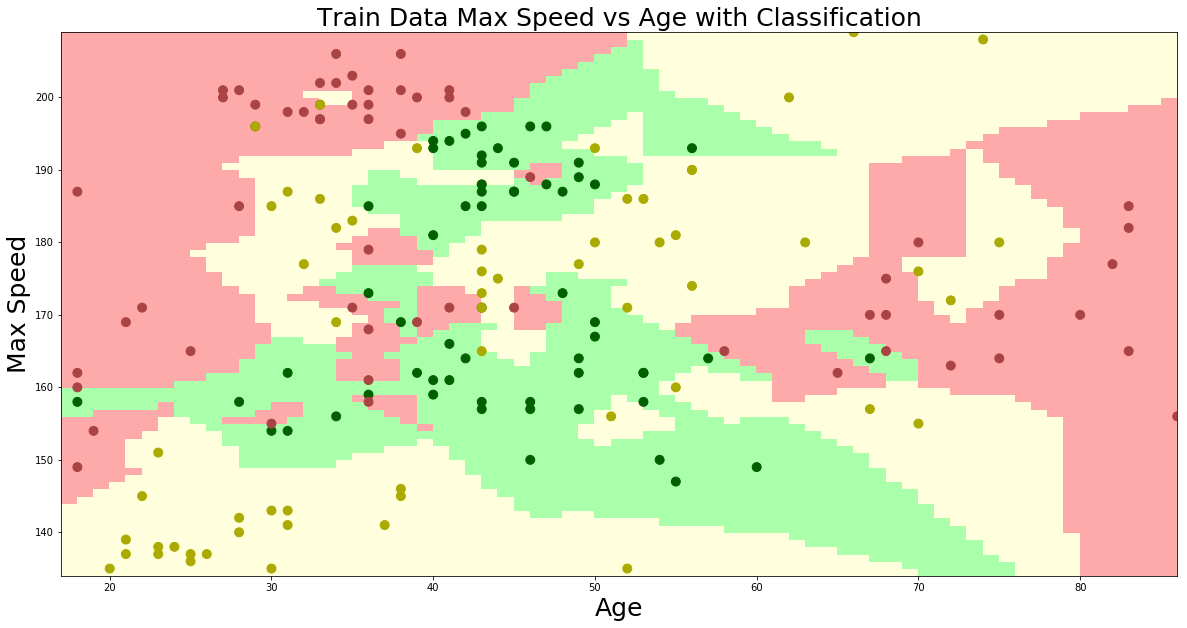

In [69]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [70]:
clf.score(X_train_2_dim, y_train)

0.97777777777777775

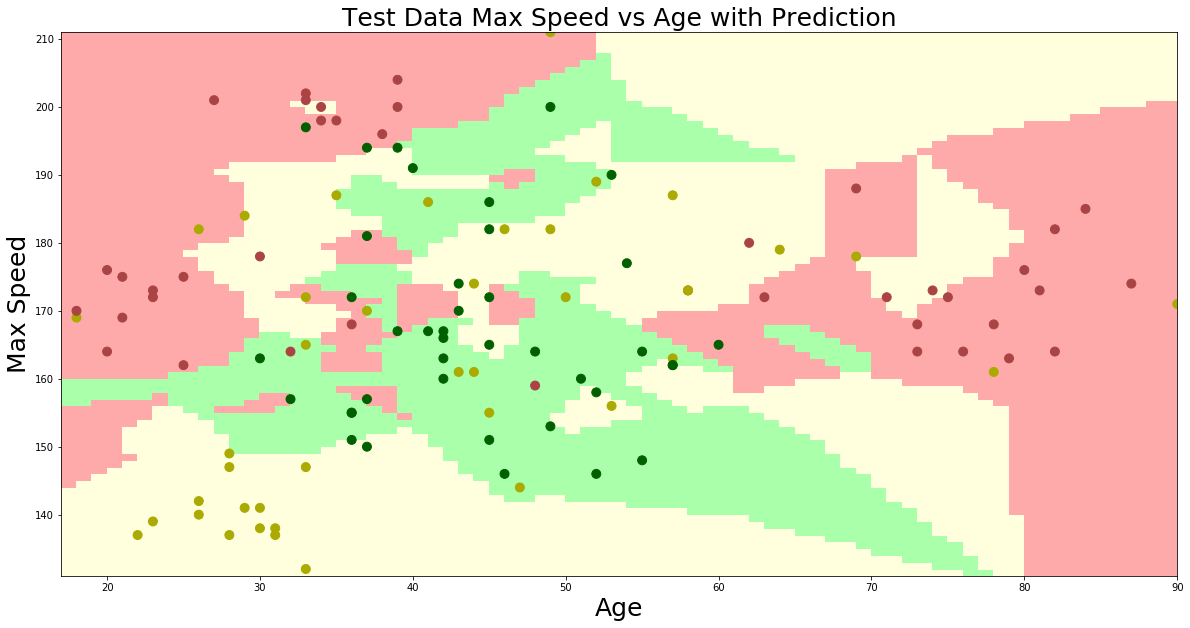

In [71]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [72]:
clf.score(X_test_2_dim, y_test)

0.65000000000000002

In [73]:
clf = neighbors.KNeighborsClassifier(13)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 867 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

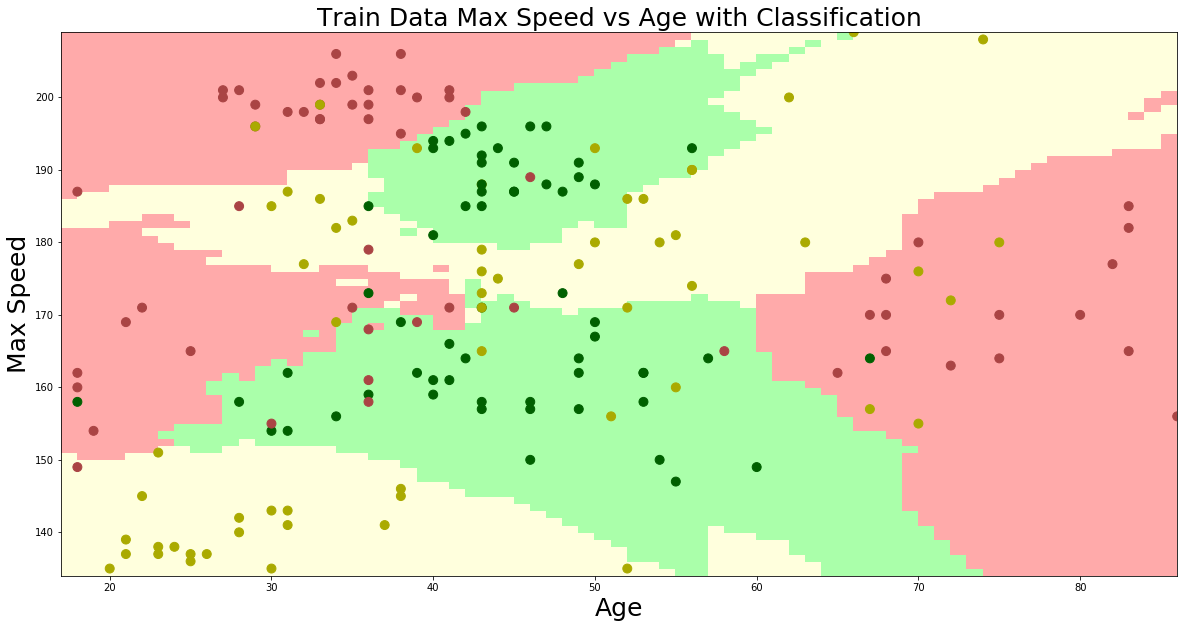

In [74]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [75]:
clf.score(X_train_2_dim, y_train)

0.81111111111111112

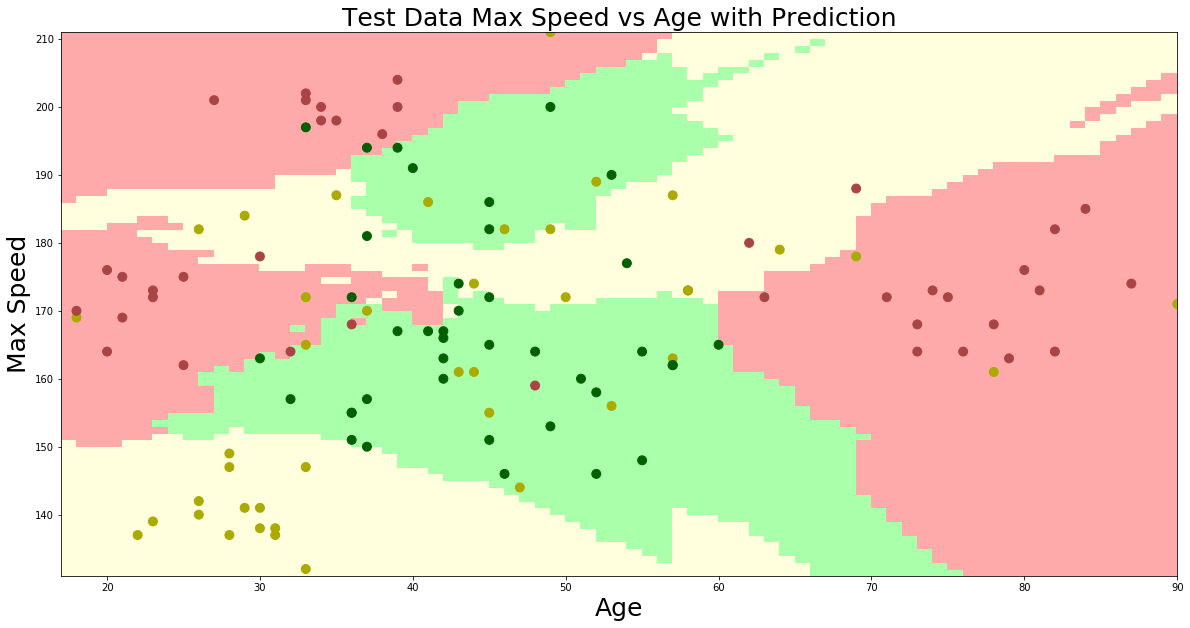

In [76]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [77]:
clf.score(X_test_2_dim, y_test)

0.7416666666666667

In [78]:
clf = neighbors.KNeighborsClassifier(13)
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.08 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [79]:
clf.score(X_train, y_train)

0.77777777777777779

In [80]:
clf.score(X_test, y_test)

0.75

In [81]:
prediction = clf.predict(X)
y_pred = prediction
y_pred

array([1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2,
       0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 0,
       1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2,
       1])

In [82]:
y_true = y
y_true

array([1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0,
       2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0,
       1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1,
       1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2,
       2])

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[81, 14,  5],
       [ 5, 91,  4],
       [16, 26, 58]])

Text(33,0.5,'Ground Truth')

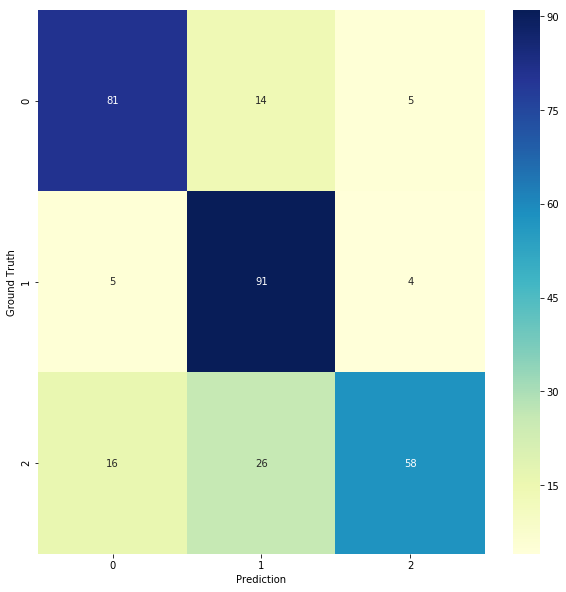

In [84]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap="YlGnBu")
figure = plt.gcf()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(111)
ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth')